In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from preprocess_data import load_preprocessed_data

train_df, test_df = load_preprocessed_data()

train_df.head()

Loading preprocessed Parquet files...


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Summary_tokens,Text_tokens
0,914403,B0009W5KHM,AV6QDP8Q0ONK4,2,2,1341014400,GOOD FUN FILM,While most straight to DVD films are not worth...,5,"[11230, 3727, 29397, 34020, 44]","[3633, 749, 3892, 284, 12490, 7328, 389, 407, ..."
1,354887,6303079709,A2I8RXJN80A2D2,0,0,1168819200,Movie Review,"I have wanted this one for sometime, also. I ...",5,"[25097, 6602]","[40, 423, 2227, 428, 530, 329, 17291, 11, 635,..."
2,1407653,B004H0M2XC,A3FHV3RV8Z12E6,0,0,1386201600,When is it a good time to Consent?,Actually this was a pretty darn good indie fil...,4,"[2215, 318, 340, 257, 922, 640, 284, 46869, 30]","[26417, 428, 373, 257, 2495, 39189, 922, 19907..."
3,1377458,B003ZJ9536,A12VLTA3ZHVPUY,1,1,1348704000,TRUTH,Episodes 37 to 72 of the series press on in a ...,5,"[5446, 24318]","[13807, 8052, 5214, 284, 7724, 286, 262, 2168,..."
4,475323,630574453X,A13NM1PES9OXVN,2,3,970012800,Intelligent and bittersweet -- stays with you,"I was really impressed with this movie, but wa...",3,"[5317, 32940, 290, 48666, 7277, 1377, 14768, 3...","[40, 373, 1107, 12617, 351, 428, 3807, 11, 475..."


In [3]:
# Missing values check
print("\n=== Missing Values Summary ===")
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)



=== Missing Values Summary ===
                        Missing Values  Percentage
Id                                   0    0.000000
ProductId                            0    0.000000
UserId                               0    0.000000
HelpfulnessNumerator                 0    0.000000
HelpfulnessDenominator               0    0.000000
Time                                 0    0.000000
Summary                             32    0.001885
Text                                62    0.003652
Score                                0    0.000000
Summary_tokens                       0    0.000000
Text_tokens                          0    0.000000


/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


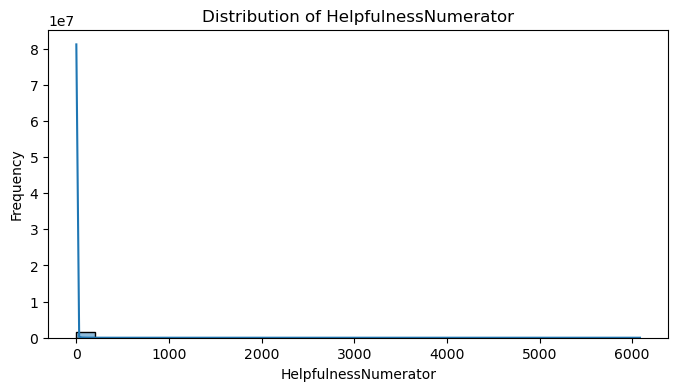

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


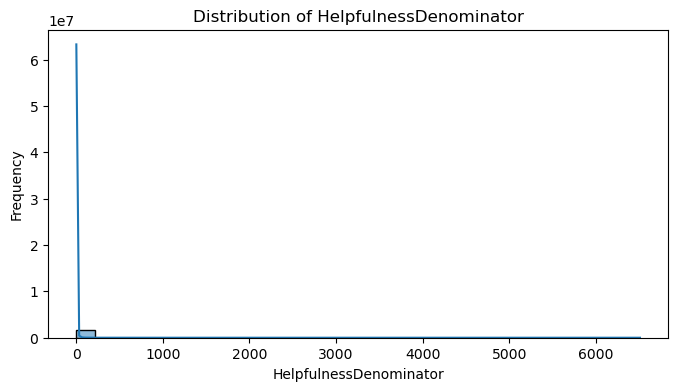

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


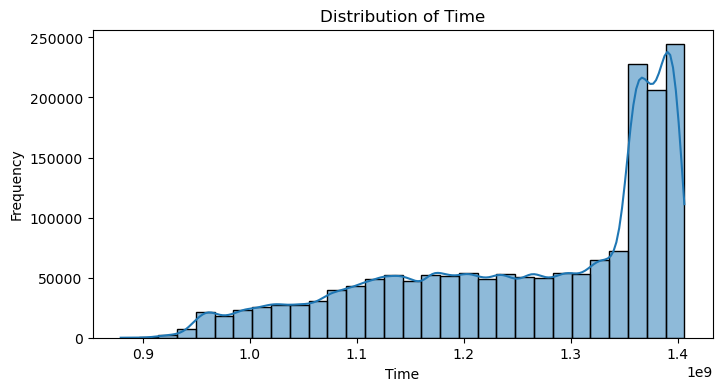

/home/m33039/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


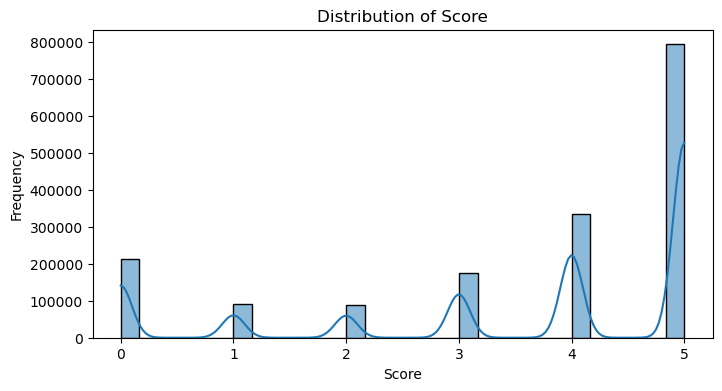

In [4]:
# Distribution of numerical features
numerical_cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Score']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



=== Correlation Matrix with Score ===
HelpfulnessNumerator     -0.009426
HelpfulnessDenominator   -0.064285
Time                      0.049992
Score                     1.000000
Name: Score, dtype: float64


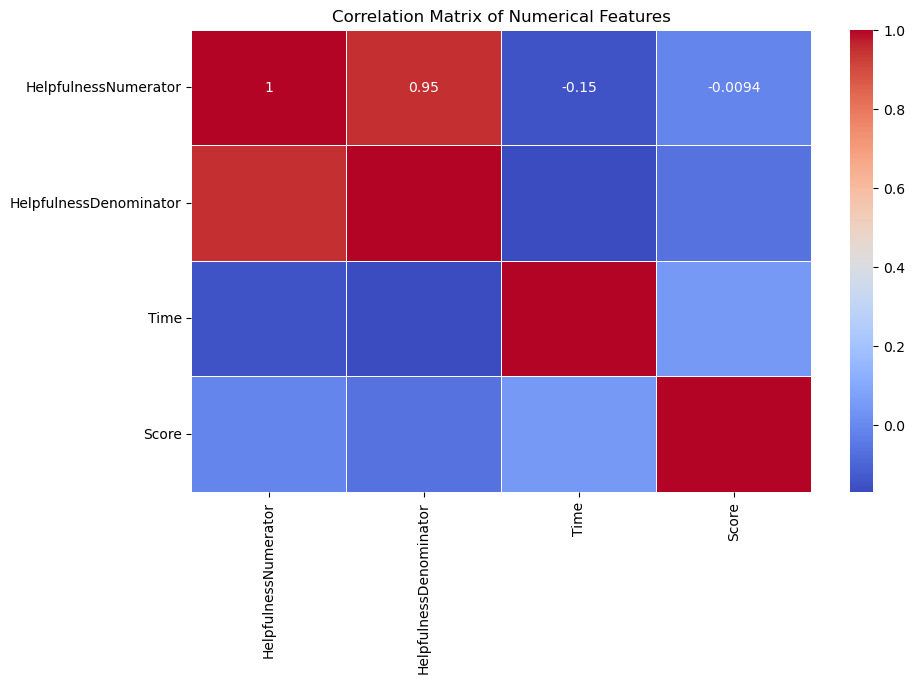

In [5]:
# Correlation between numerical features and Score
correlations = train_df[numerical_cols].corr()
print("\n=== Correlation Matrix with Score ===")
print(correlations['Score'])

# Visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()
# Box plots to detect outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Box plot of {col}")
    plt.show()


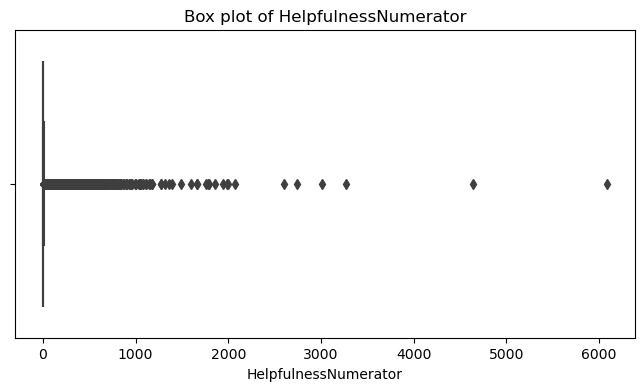

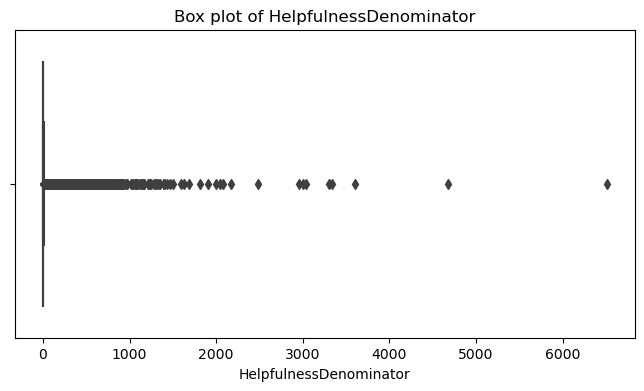

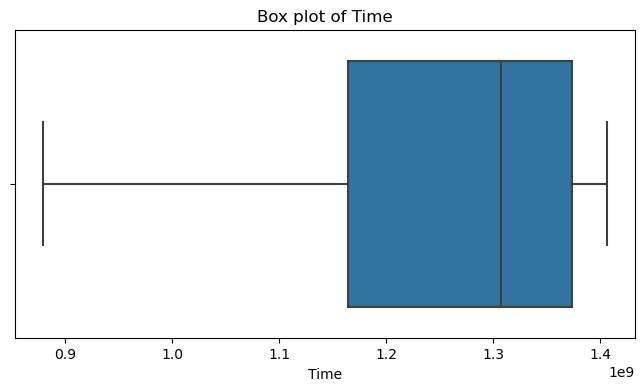

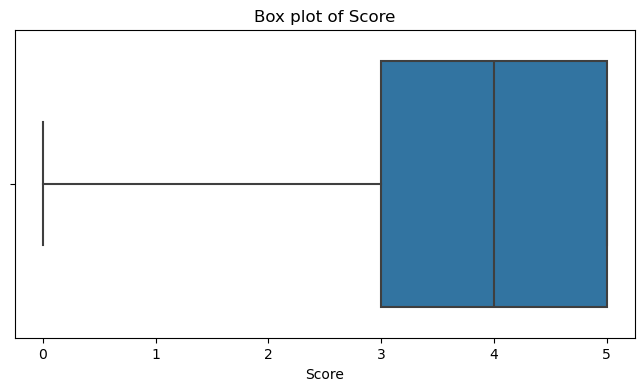

In [6]:
# Box plots to detect outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Box plot of {col}")
    plt.show()



=== Unique Values in ProductId and UserId ===
Number of unique ProductId: 50052
Number of unique UserId: 123960


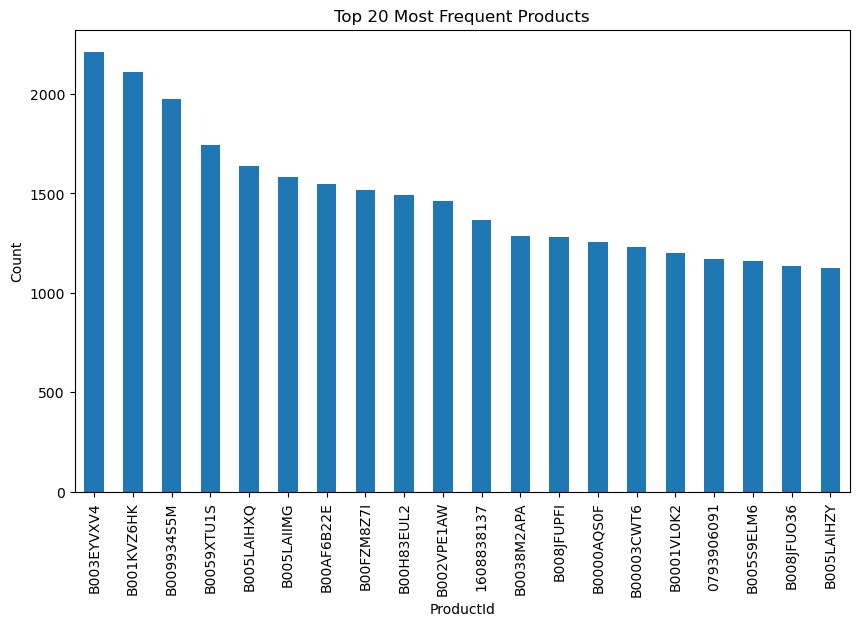

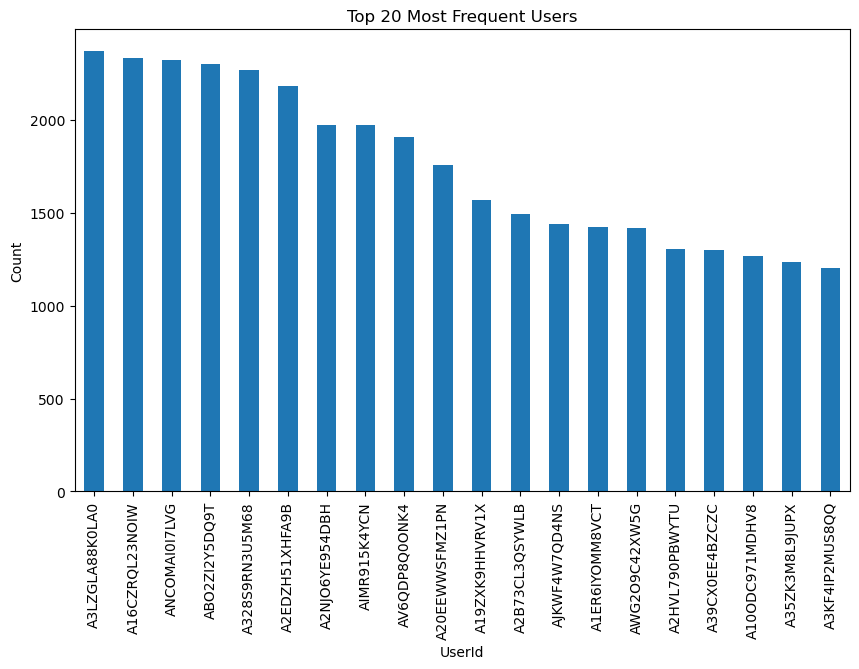

In [12]:
# Unique values of ProductId and UserId
print("\n=== Unique Values in ProductId and UserId ===")
print(f"Number of unique ProductId: {train_df['ProductId'].nunique()}")
print(f"Number of unique UserId: {train_df['UserId'].nunique()}")

# Distribution of ProductId and UserId
plt.figure(figsize=(10, 6))
train_df['ProductId'].value_counts().head(20).plot(kind='bar', title="Top 20 Most Frequent Products")
plt.xlabel("ProductId")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
train_df['UserId'].value_counts().head(20).plot(kind='bar', title="Top 20 Most Frequent Users")
plt.xlabel("UserId")
plt.ylabel("Count")
plt.show()


In [13]:
# Review counts per ProductId and UserId in train data
train_product_counts = train_df['ProductId'].value_counts()
train_user_counts = train_df['UserId'].value_counts()

# Percentage of ProductId with 1, 2, or 3 reviews in train
train_product_1_review = (train_product_counts == 1).mean() * 100
train_product_2_reviews = (train_product_counts == 2).mean() * 100
train_product_3_reviews = (train_product_counts == 3).mean() * 100

# Percentage of UserId with 1, 2, or 3 reviews in train
train_user_1_review = (train_user_counts == 1).mean() * 100
train_user_2_reviews = (train_user_counts == 2).mean() * 100
train_user_3_reviews = (train_user_counts == 3).mean() * 100

# Repeat for test data
test_product_counts = test_df['ProductId'].value_counts()
test_user_counts = test_df['UserId'].value_counts()

# Percentage of ProductId with 1, 2, or 3 reviews in test
test_product_1_review = (test_product_counts == 1).mean() * 100
test_product_2_reviews = (test_product_counts == 2).mean() * 100
test_product_3_reviews = (test_product_counts == 3).mean() * 100

# Percentage of UserId with 1, 2, or 3 reviews in test
test_user_1_review = (test_user_counts == 1).mean() * 100
test_user_2_reviews = (test_user_counts == 2).mean() * 100
test_user_3_reviews = (test_user_counts == 3).mean() * 100

# Display results
print("=== Train Data: Product Reviews ===")
print(f"Percentage of ProductId with 1 review: {train_product_1_review:.2f}%")
print(f"Percentage of ProductId with 2 reviews: {train_product_2_reviews:.2f}%")
print(f"Percentage of ProductId with 3 reviews: {train_product_3_reviews:.2f}%")

print("\n=== Train Data: User Reviews ===")
print(f"Percentage of UserId with 1 review: {train_user_1_review:.2f}%")
print(f"Percentage of UserId with 2 reviews: {train_user_2_reviews:.2f}%")
print(f"Percentage of UserId with 3 reviews: {train_user_3_reviews:.2f}%")

print("\n=== Test Data: Product Reviews ===")
print(f"Percentage of ProductId with 1 review: {test_product_1_review:.2f}%")
print(f"Percentage of ProductId with 2 reviews: {test_product_2_reviews:.2f}%")
print(f"Percentage of ProductId with 3 reviews: {test_product_3_reviews:.2f}%")

print("\n=== Test Data: User Reviews ===")
print(f"Percentage of UserId with 1 review: {test_user_1_review:.2f}%")
print(f"Percentage of UserId with 2 reviews: {test_user_2_reviews:.2f}%")
print(f"Percentage of UserId with 3 reviews: {test_user_3_reviews:.2f}%")


KeyError: 'ProductId'